<h3 align="center"> <font color='Green'>A complete guide on Logistic Regression(Using mental health survey)</font></h3> 

## Table of Contents



1.  <a href="#1.What-is-Logistic-Regression?">Logistic Regression overview</a>
2.  <a href="#2.Problem-Statement">Understanding the problem statement</a>
3.  <a href="#3.Importing-Libraries">Importing Libraries </a>
4.  <a href="#4.Importing-data">Importing data</a>
5.  <a href="#5.Understanding-the-Dataset">Understanding the Dataset</a>
6.  <a href="#6.Preprocessing-the-data">Data Pre-processing</a>
7.  <a href="#7.Extrapolatory-Data-Analysis">Extrapolatory Data Analysis</a>
8.  <a href="#8.Preparing-the-data-for-building-model">Preparing dataset for model building</a>
9.  <a href="#9.Generalised-functions-for-model-evaluation">Generalised functions for model evaluation</a>
10. <a href="#10.Model-1(Logistics-Regression)">Logistic Regression model</a>
11. <a href="#11.Model-2(Logistics-Regression-model-fine-tuned)">Logistic regression with hyperparameter tuning</a>
12. <a href="#12.Conclusion">Conclusion</a>

# 1.What is Logistic Regression?

It is a parametric algorithm of machine learning which predicts the probability of occurence of an event by fitting data to a logit function.Logistics regression predicts probability,hence the output of a logistic regression lies between 0 and 1.

**<font color='blue'><u>Some important terms:</u></font>**<br>

**1.Log of odds:**

It is the logarithm of ratio between probability of an event occuring to the probability of an event not occuring.

 log of odds= $log\frac{p}{(1-p)}$ 


**2.Log-likelihood:**

For each data point in a logit curve log of odds is found.All the log of odds are added to get the log-likelihood value of a logit curve.The curve with the highest log-likelihood value is considered to be the best fit curve for the dataset.


Below is the diagram of a logit curve.The curve lies between 0 and 1.

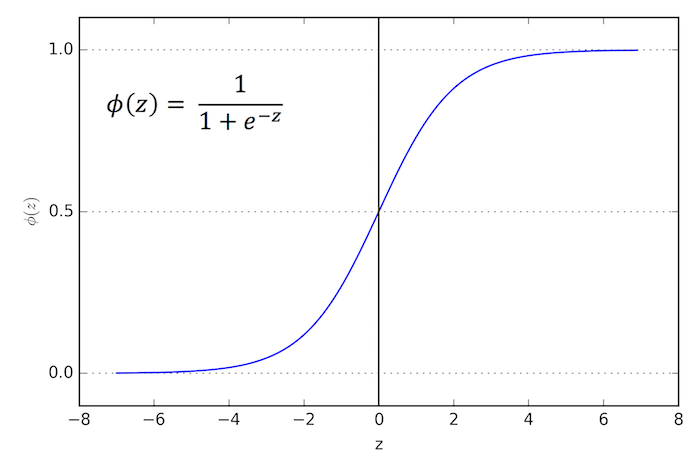


The hypothesis function=$\frac{1}{1+e^(-z)}$

$z= W_0+W_1*X_1+W_2*X_2+...+W_n*X_n$

The cost function = $-y * log(\hat y)-(1-y) * log(1-\hat y)$

The main goal is to reduce the cost function and it is done by updating the weights.Optimizers are used to reduce the cost function.

<font color='blue'><u>Different types of optimizers are:</u></font>

1. Simple gradient descent
2. Stocastic gradient descent
3. Mininbatch gradient descent
4. Adagrad
5. RMS Prop
6. Adam

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">To know more about logistic regression click here</a>


# 2.Problem Statement


Increasing work pressure and the modern lifestyle have added to the mental stress of all the employees around the world.Mental health of employees are getting deteriorated due to innumerable reasons.The objective of the project is to predict whether an employee requires mental attention or not depending upon various factors.Logistic regression has been used to predict 

**<font color='blue'><u>Data Definitions:</u></font>**

1.Timestamp:Time and date at which the data has been collected

2.Age: Age of the person whose data has been collected

3.Gender: Gender of the person whose data has been collected

4.Country: Country in which the person lives

5.state: If you live in the United States, which state or territory do you live in?

6.self_employed: Are you self-employed?

7.family_history: Do you have a family history of mental illness?

8.treatment: Have you sought treatment for a mental health condition?

9.work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

10.no_employees: How many employees does your company or organization have?

11.remote_work: Do you work remotely (outside of an office) at least 50% of the time?

12.tech_company: Is your employer primarily a tech company/organization?

13.benefits: Does your employer provide mental health benefits?

14.care_options: Do you know the options for mental health care your employer provides?

15.wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

16.seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

17.anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

18.leave: How easy is it for you to take medical leave for a mental health condition?

19.mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

20.physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

21.coworkers: Would you be willing to discuss a mental health issue with your coworkers?

22.supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

23.mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

24.physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

25.mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

26.obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

27.comments: Any additional notes or comments

# 3.Importing Libraries

In [245]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# importing function to perform classification
from sklearn.linear_model import LogisticRegression


#'train_test_split' function is used to split the data for training and testing the model
from sklearn.model_selection import train_test_split

# 'GridSearchCV' is used to search for the best parameters to train the model
from sklearn.model_selection import GridSearchCV

#importing different metrics for evaluating the model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# display all columns of the dataframe
pd.options.display.max_columns = None

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 4.Importing data

In [195]:
#importing datasets for training and testing the models
df=pd.read_csv("train_1.csv")

#displaying the first 5 records from the training data set
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


**<font color='blue'><u>Inference from the display above:</u></font>**

1. The 'comment' column has nan values.

2. 'no_employees' column has got a range of values and not the exact number of employees.

3. 'Timestamp' column has both the date and time clubbed together. We need to create two seperate columns of date and time for     better usage of the data.

4. We can see that in 'Gender' column there are different notations of male. We need to check this column and make all the notations same.

<a href="#Table-of-Contents">Back to top </a>

# 5.Understanding the Dataset

In [196]:
#checking the number of rows and columns in the training data set
df.shape

(1259, 27)

The dataset has 1259 columns and 27 records

**<font color='blue'><u>Data Type:</u></font>**

The main data types in Pandas dataframes are the object, float64, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical,categorical and datetime variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
>1. Check for the data type <br>
>2. For any incorrect data type, change the data type with the appropriate type

In [197]:
# 'info' function gives the data type and null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**<font color='blue'><u>Deductions from the above display:</u></font>**

1.From the above output we can see that all the features are of object data type, except serial number and age.
  But timestamp is wrongly attributed as object which should be datetime datatype.We will convert the datatype of timestamp. 

2.The 'comments','state' and 'work interfere' columns have many missing values, we need to handle them.

**<font color='blue'><u>Summary Statistics:</u></font>**

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for categorical variables.

In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables
1. For numerical variables, use the describe()<br>
2. For categorical variables, use the describe(include=object)

In [198]:
# the describe() returns the statistical summary of the numeric variables
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


**From the above output we can see that the 'Age' column has some discrepency.The maximum age is 99999999999 and the minimum is -1726.We need to look into the column.**

In [136]:
#it gives the statistical summary of all the categorical variables
df.describe(include=object)

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


**<font color='blue'><u>Deductions:</u></font>**

1. From the above output we can see that the state,self-employed,work_interfere and the comments columns have missing data as      the count is less than 1259.We will handle these columns.


2. We see that in gender column there are 45 unique values.We need to see this column for any redundancy or error.
 
 
3. The country column has 48 unique values and the data has been maximum taken from United States and the frequency is 751 out    of 1259 records.

# 6.Preprocessing the data

**<font color='blue'>Why is preprocessing of data required? </font>**


It is said a model is as good as its data. This is the reason we need to prepare the data before training the model.
Data preparation is the process of cleaning and transforming raw data before building predictive models.In data preprocessing following steps are followed as and when required.<br><br>
                        Here, we analyze and prepare data to perform regression analysis:<br>
                        
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate 
                        2. If data types are not as per business definition, change the data types as per requirement 
                        3. Study summary statistics
                        4. Distribution of variables
                        5. Study correlation
                        6. Detect outliers
                        7. Check for missing values
                        8. Do feature engineering to add meaning features to train the model
**<u>Note</u>**: It is an art to explore data, and one needs more and more practice to gain expertise in this area

In [200]:
# Splitting the timestamp feature as it includes both date and time
# first converting the column to string as 'split' function can be applied on strings
# The arguments in the split function (" ",n=1,expand=True) means that the column will be splitted from the first space encountered

df[['Date','Time']]=df['Timestamp'].str.split(" ",n=1,expand=True)

# dropping the timestamp column as we have already created two columns which have date and time
# axis=1 deletes the entire column

df.drop('Timestamp',axis=1,inplace=True)

# converting the datatype of date and time columns
# 'to_datetime' method of pandas helps to convert a column into datetime datatype

df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')
df['Date']=pd.to_datetime(df['Date'])

In [201]:
#finding the unique values in the column gender
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

**We see that there are lots of misspelled words and synonymns have been used.This is the reason there are 45 unique values.We will convert them into 3 parts male(M),female(F) and transgender(T).**

In [204]:
# creating a dictionary error
# This dictionary will be mapped to the gender column using the function 'map'
error={'Female':'F',
      'Male':'M',
      'male':'M',
      'female':'F',
      'm':'M',
      'Male-ish':'M',
      'maile':'M',
      'Trans-female':'T',
      'Cis Female':'F',
      'something kinda male?':'M',
      'Cis Male':'M',
      'Woman':'F',
      'f':'F',
      'Mal':'M',
       'Male (CIS)':'M',
      'queer/she/they':'F',
      'non-binary':'T',
      'Enby':'T',
      'Femake':'F',
      'woman':'F',
      'Make':'M',
      'fluid':'T',
      'Malr':'M',
      'cis male':'M',
      'Female (cis)':'F',
      'Guy (-ish) ^_^':'M',
      'queer':'T',
      'Female (trans)':'T',
      'male leaning androgynous':'T',
       'Neuter':'T',
       'cis-female/femme':'F',
       'msle':'M',
       'Agender':'T',
       'Genderqueer':'T',
       'Female':'F',
       'Androgyne':'T',
       'Nah':'T', 
       'All':'T',
      'Female ':'F',
       'Male ':'M', 
       'Man':'M', 
       'Trans woman':'T', 
       'Mail':'M',
       'A little about you':'T',
       'p':'T',
       'femail':'F',
       'Cis Man':'T',
       'ostensibly male, unsure what that really means':'T'
      }

# mapping all the misspelled and synonymous words to 'M','F' and 'T' for male,female and transgender
# this will help in reducing the complexity
df['Gender']=df['Gender'].map(error).fillna(df['Gender'])

In [205]:
# checking the unique values after removing the redundancies
df['Gender'].unique()

array(['F', 'M', 'T'], dtype=object)

**After applying the map function to the column gender and mapping the misspelled words and synonymns into 'M','F' and 'T' we see that there are only 3 unique values.**

In [206]:
#Checking the number of male,female and transgender in the gender column
df['Gender'].value_counts()

M    992
F    248
T     19
Name: Gender, dtype: int64

**From the function 'valuecounts()' it can be clearly seen that the number of males in the data set are 992,females are 248 and transgender are 19.**

In [207]:
#finding the unique values of age column
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [211]:
# removing the redundant values from the age column
# the 'age' of an employee can be between 18 to 60 years
df=df[df['Age']>=18]
df=df[df['Age']<=60]

# Label encoding of the treatment column

In [144]:
# replace 'no' with zero
df['treatment'] = df['treatment'].replace('No', 0)
# replace 'yes' with one
df['treatment'] = df['treatment'].replace('Yes', 1)

#displaying the first 5 records to check the treatment column after label enconding
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date,Time
0,37,F,United States,IL,NaN,No,1,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014-08-27,1900-01-01 11:29:31
1,44,M,United States,IN,NaN,No,0,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,2014-08-27,1900-01-01 11:29:37
2,32,M,Canada,NaN,NaN,No,0,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,2014-08-27,1900-01-01 11:29:44
3,31,M,United Kingdom,NaN,NaN,Yes,1,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014-08-27,1900-01-01 11:29:46
4,31,M,United States,TX,NaN,No,0,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014-08-27,1900-01-01 11:30:22


In [246]:
# finding the distribution of classes of dependent variable
df['treatment'].value_counts()

Yes    630
No     617
Name: treatment, dtype: int64

**From the above output we see that the data is mostly balanced**

<a href="#Table-of-Contents">Back to top </a>

# 7.Extrapolatory Data Analysis


**<font color='blue'>Why do we need extrapolatory data analysis?</font>**

It is required to do extrapolatory data analysis on the data to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It can be univariate or bivariate analysis where we analyze a single feature or analyze two features together respectively.

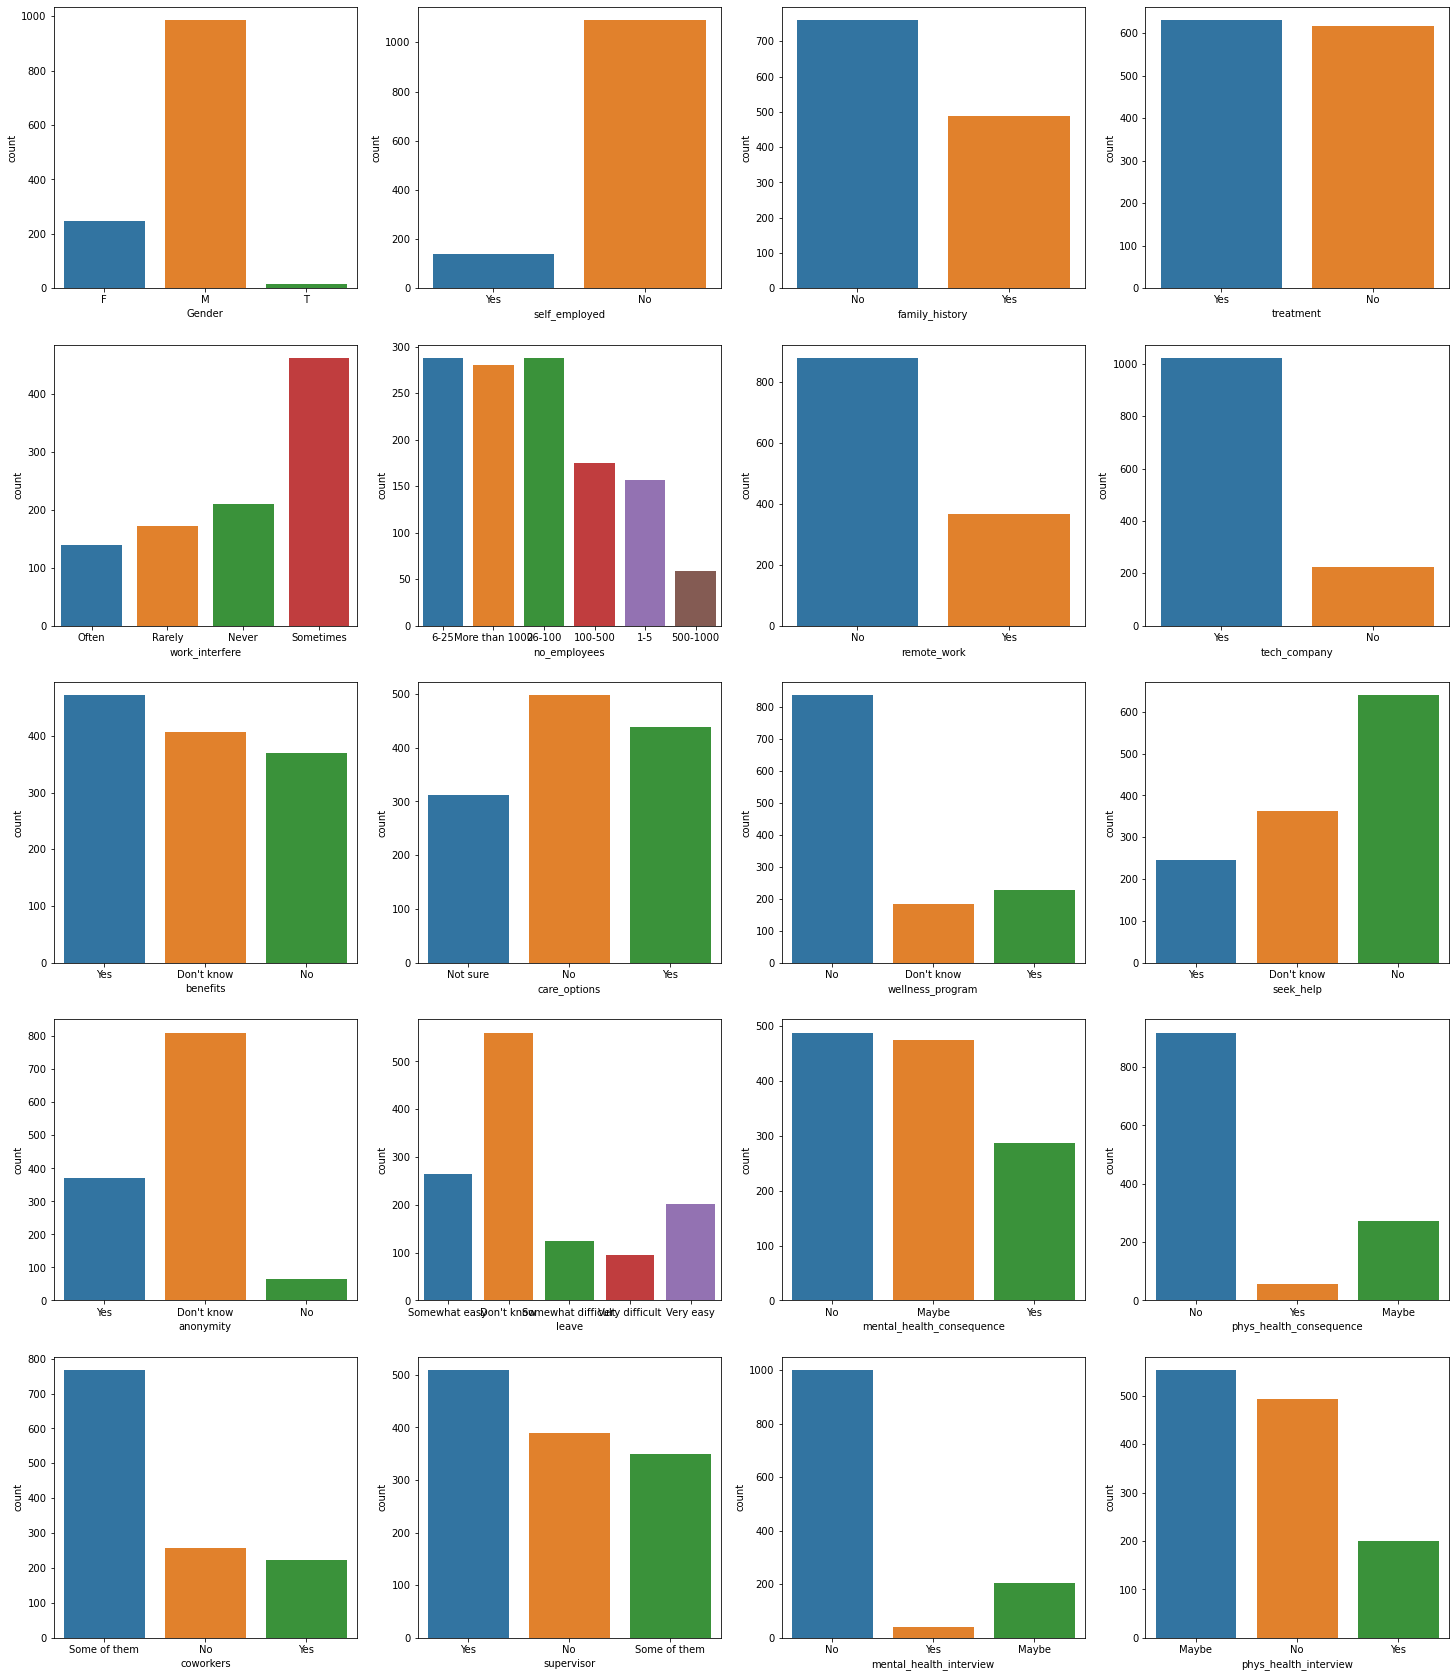

In [219]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]
z=['Country','state']
# use for loop to check the data type of each variable
for column in df:
    
    # use 'if' statement with condition to check the categorical type 
    # only categorical columns will be appended to the categorical list
    # We do not want the barplot of the countries and states as there are many values in them
    # So we did not add them in categorical
    if (is_string_dtype(df[column]) and column not in z):
        
        # append the variables with 'categoric' data type in the list 'categorical'
             categorical.append(column)


# plot the count plot for each categorical variable 
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    sns.countplot(df[variable], ax = subplot)

# display the plot
plt.show()

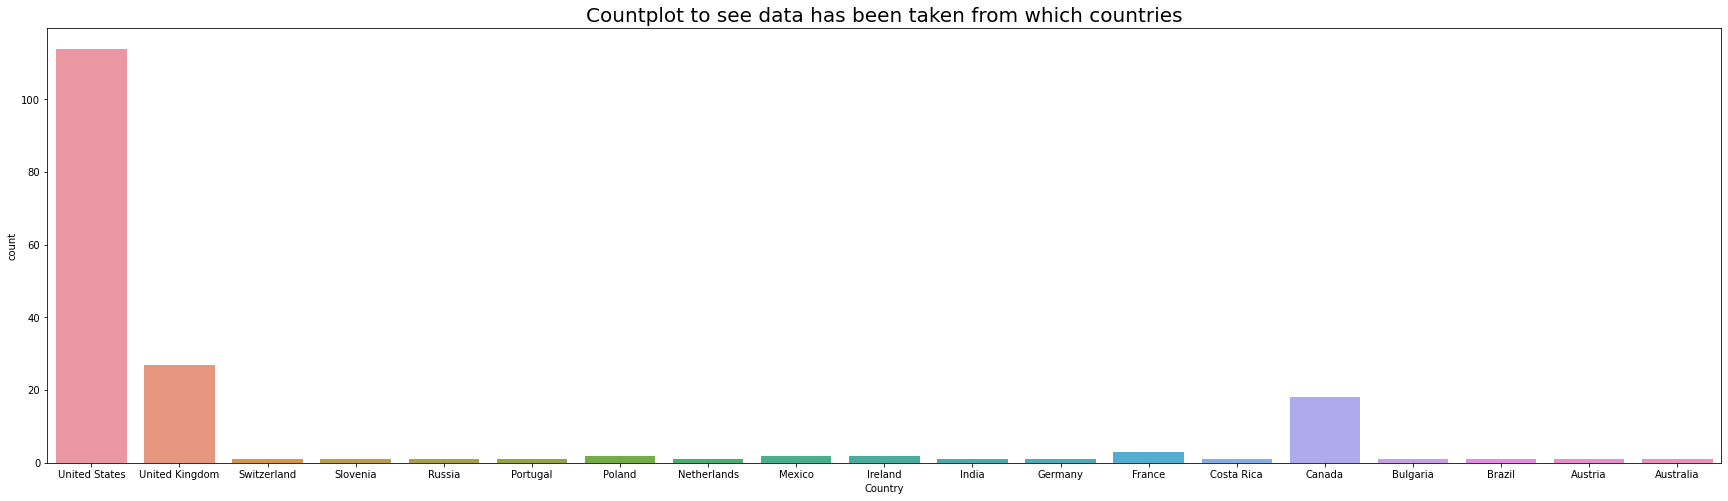

In [221]:
# plotting the counterplot for the country column 
# to see the countries from which data has been collected
plt.figure(figsize=(30,8))
k=df['Country'][:180]
sns.countplot(k.sort_values(ascending=False))
plt.title("Countplot to see data has been taken from which countries",fontsize=20)
plt.show()

**From the plot we can see that the maximum data has been taken from United States followed by United Kingdom**

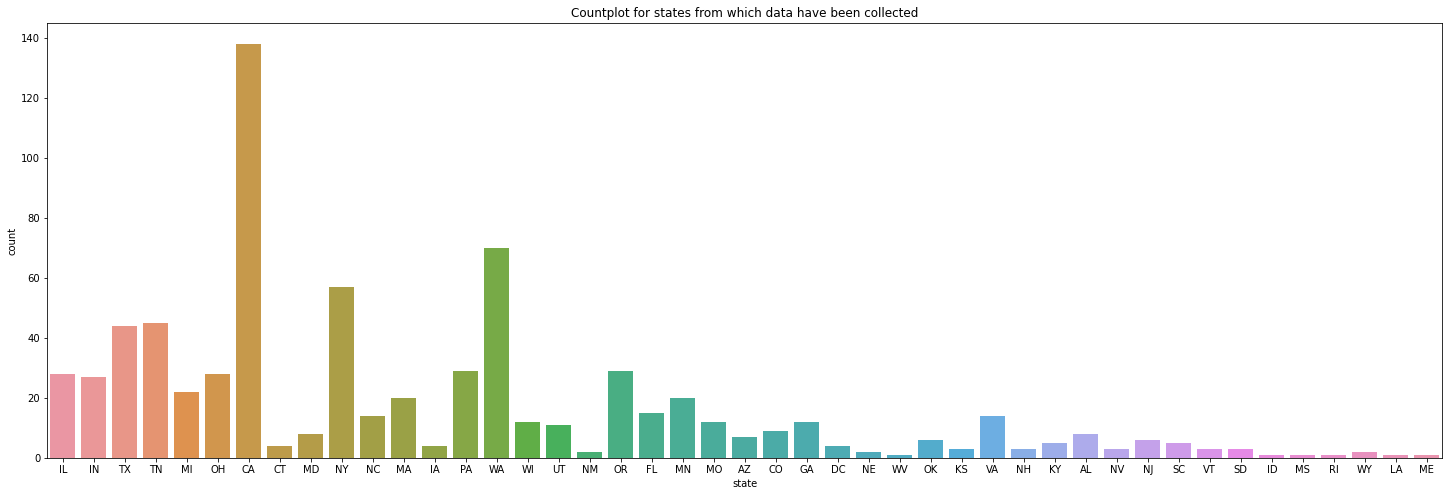

In [148]:
# plotting the countplot to see from which state the data have been collected
plt.figure(figsize=(25,8))
sns.countplot(df['state'])
plt.title("Countplot for states from which data have been collected")
plt.show()

**From the plot we can see that maximum data has been collected from California followed by Washington**

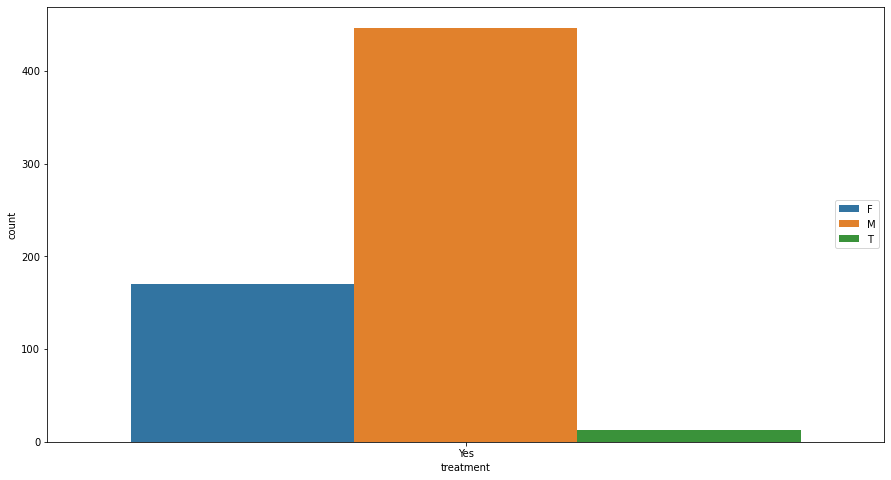

In [247]:
#Checking employees who require treatment are from which gender
sns.countplot(df.treatment,hue=df.Gender,order=df['treatment'].value_counts().iloc[0:1].index)
plt.legend(loc='right')
plt.show()

**It can be clearly seen that males requires more treatment**

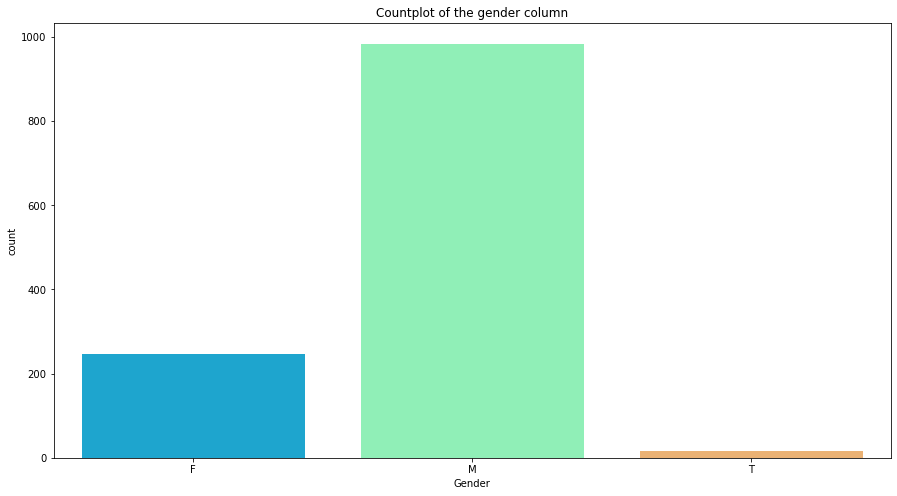

In [248]:
#plotting the countplot for the gender column
sns.countplot(df['Gender'],palette='rainbow')
plt.title("Countplot of the gender column")
plt.show()

**Maximum data collected are of males.**

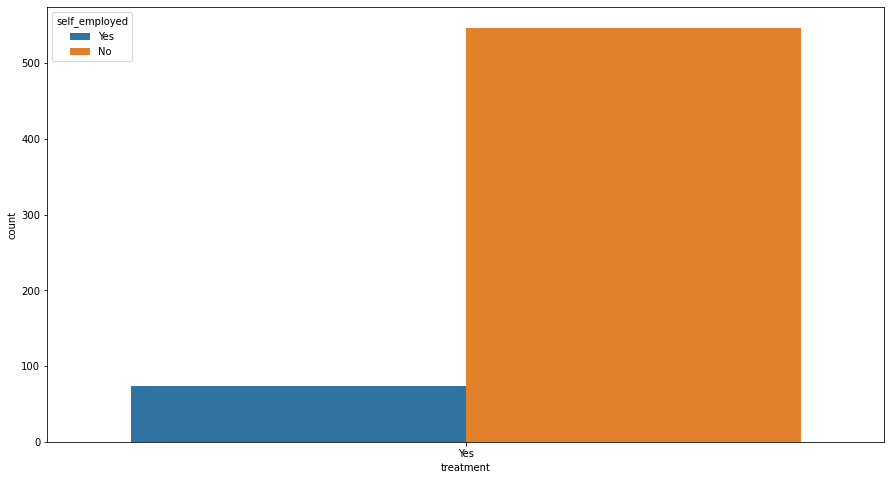

In [249]:
#plotting countplot to see how many self-employed people requires treatment
sns.countplot(df.treatment,hue=df['self_employed'],order=df['treatment'].value_counts().iloc[0:1].index)
plt.show()

**We can see that self-employed people hardly needs any mental treatment.**

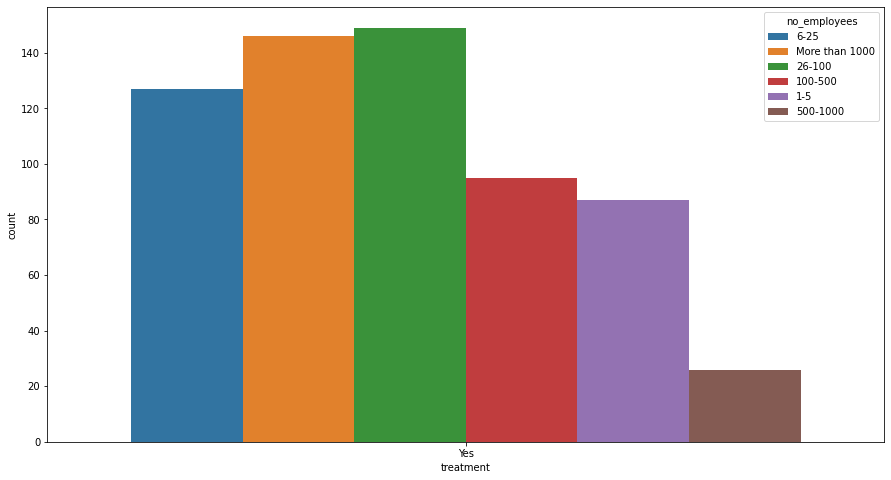

In [251]:
#checking does number of employees in an organisation affects the treatment rate
sns.countplot(df.treatment,hue=df['no_employees'],order=df['treatment'].value_counts().iloc[0:1].index)
plt.show()

**We can see from the plot that organisation which have 26-100 employees requires mental attention followed by organisations with 1000+ employees.**

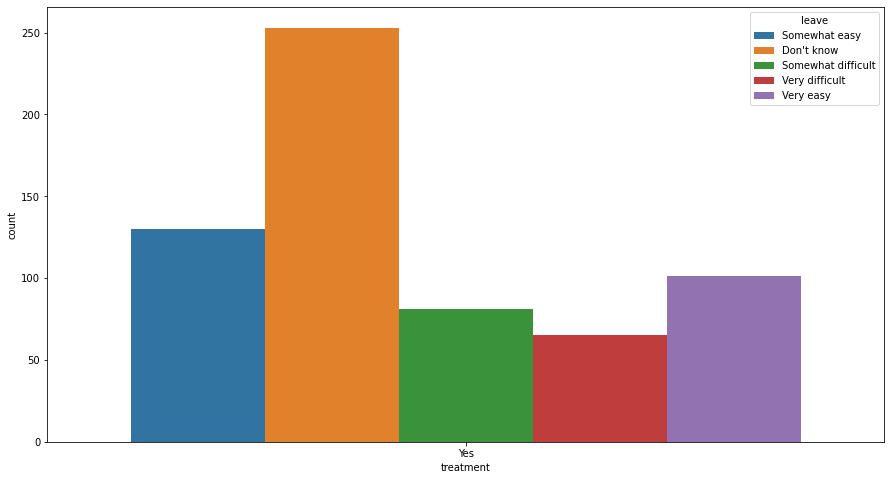

In [252]:
#plot to see how taking medical leave have impact on mental health
sns.countplot(df['treatment'],hue=df['leave'],order=df['treatment'].value_counts().iloc[0:1].index)
plt.show()

**We can see that the employees who don't know whether they will get leave for medical health condition requires maximum mental treatment.**

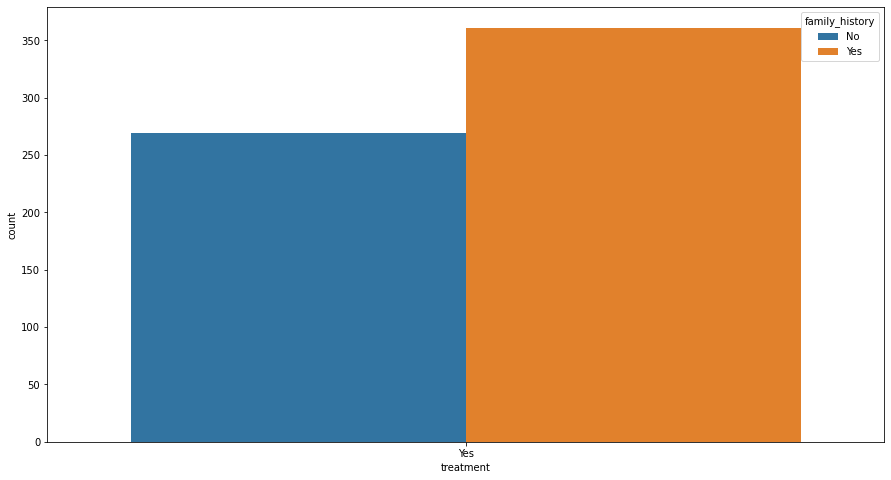

In [253]:
# plot to see employees requiring mental attention does depends upon their family history or not
sns.countplot(df.treatment,hue=df['family_history'],order=df['treatment'].value_counts().iloc[0:1].index)
plt.show()

**As per the data, employees with family history of mental illness requires more mental health treatment.** 

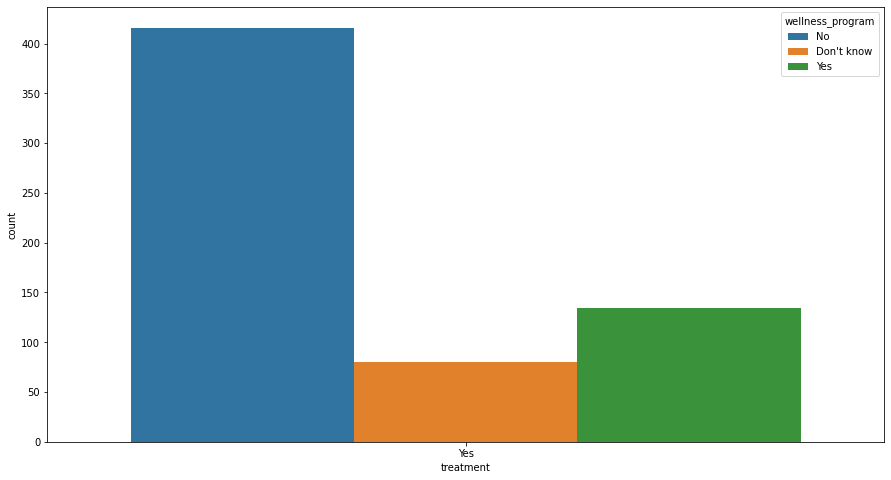

In [254]:
# organisations conduting wellness program versus mental illness of employees
sns.countplot(df['treatment'],hue=df['wellness_program'],order=df['treatment'].value_counts().iloc[0:1].index)
plt.show()

**The employees whose employer does not conduct mental health program suffers more from mental illness**

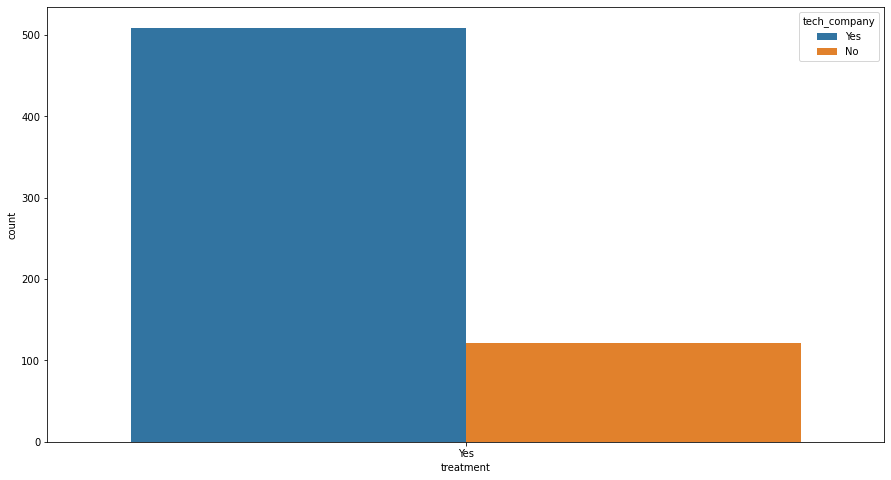

In [255]:
# technology organisations versus mental illness of employees
sns.countplot(df['treatment'],hue=df['tech_company'],order=df['treatment'].value_counts().iloc[0:1].index)
plt.show()

**From the plot we can see that the tech company employees suffers from mental illness broadly as compared to other oganization employees.**

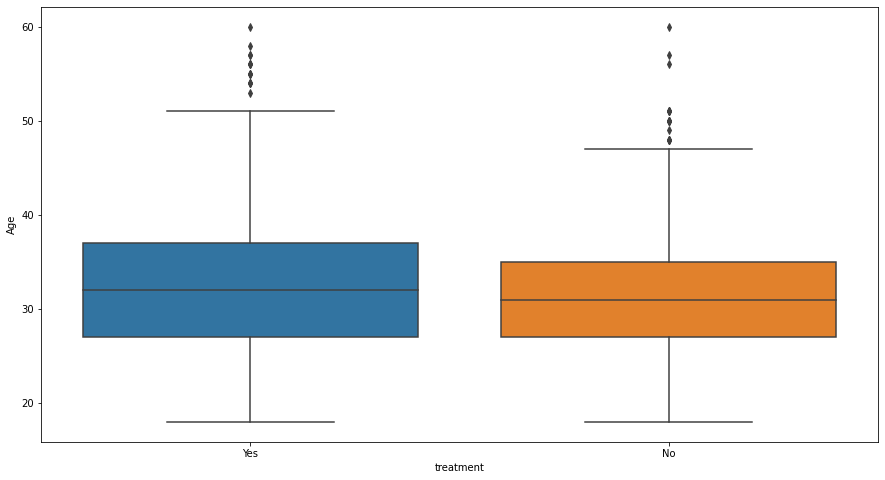

In [226]:
#plotting the bar plot for age to see if there is any outlier
sns.boxplot(x=df.treatment,y=df['Age'])
plt.show()

**We see that people who requires treatment are in the range of 20-50years approximately.The age group of 28-38 years encompasses the area between 1st and 3rd quartiles.**

# Finding the missing values

In [157]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
Percent = ((Total*100)/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
comments,1091,87.071030
state,513,40.941740
work_interfere,262,20.909816
self_employed,18,1.436552
Age,0,0.000000
leave,0,0.000000
Date,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000


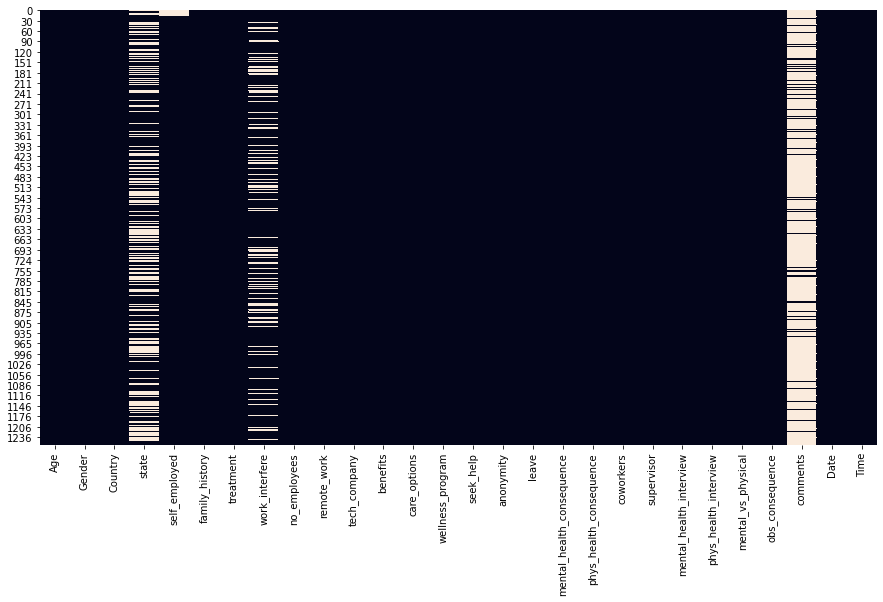

In [158]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

**There are missing values in the comments,work interfere and state columns.**

# Handling the missing values

**<font color='blue'><u>Ways to handle missing values:</u></font>**

1. If the missing value in a column is above 40% then we drop that column.It is because if we replace the missing values with      any number then the model will get biased towards it.

2. We use median or mode of a partivular column to handle the missing values when the datatype of the column is categorical or    when there are outliers in a continuous feature column.

3. For continuous feature we use mean of that column to replace the misisng values in a column, except for columns having          outliers as mentioned above.

4. As per the business requirement we may need to keep a column with more than 40% missing values. In such a scenario we          replace the missing values in that column with a string type of data as 'data not available' or so.

<u>**Note:**</u> It is a learned hit and trial method to replace the missing values.We need to try different approach in order to improve the accuracy of the model.

In [159]:
# dropping the comments column as it contains many missing values around 87%
df.drop('comments',axis=1,inplace=True)

# replacing the missing values in 'work interfere' column with 'not mentioned' as it contains 20% missing values
df['work_interfere']=df['work_interfere'].fillna('Not mentioned')

# dropping the state and country columns as the state column has 40% missing values and maximum data is from United States
df.drop(['state','Country'],axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

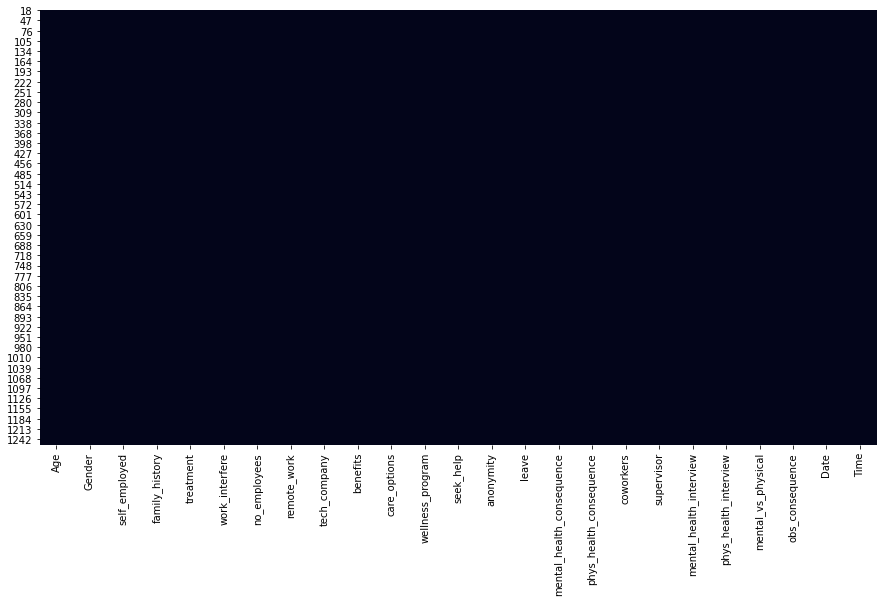

In [160]:
#Checking if all the null values have been handled or not
sns.heatmap(df.isnull(),cbar=False,color='black')
plt.show()

**<font color='blue'><u>Deductions from EDA process:</u></font>**

1.We can see that self-employed people hardly needs any mental treatment.

2.Maximum data collected are of males.

3.It can be clearly seen that males requires more treatment

4.We can see from the plot that organisation which have 26-100 employees requires mental attention followed by organisations     with 1000+ employees.

5.We can see that the employees who don't know whether they will get leave for medical health condition requires maximum mental   treatment.

6.As per the data, employees with family history of mental illness requires more mental health treatment.

7.The employees whose employer does not conduct mental health program suffers more from mental illness

8.We see that people who requires treatment are in the range of 20-50years approximately.The age group of 28-38 years             encompasses the area between 1st and 3rd quartiles.

9.There are missing values in the comments,work interfere and state columns.

10.Number of male employees are greater than the female and transgender employees in the dataset.

11.Few number of employees in the data set are self-employed.

12.Maximum employees doesnot have any family history of mental illness.

13.Maximum employees feel that their mental condition sometimes interfere with their work.

14.Maximum employees whose data has been provided does not work from remote 50% of the time.

15.Maximum employees who have mental condition works in tech company.

16.Employees who doesnot know about mental health care that their employer provides or whose employer has not discussed mental                health as part of an employee wellness program have mental health issue.

17.Many employees are willing to share their mental health issue with their supervisor.

18.Few employees are willing to share their mental health issue with their coworkers.

<a href="#Table-of-Contents">Back to top </a>

# 8.Preparing the data for building model

We need to perform dummy encoding on our categorical variables before we proceed; since the model can understand only the numeric data. <br><br>
                    <font color='blue'>In order to dummy encode the categorical variables, we perform the following steps: <br></font>
                    
                    1. Filter numerical and categorical variables
                    2. Dropping target variable and date time variable
                    2. Dummy encode the catergorical variables
                    3. Concatenate numerical and dummy encoded categorical variables

In [161]:
#Creating two dataframes df_features and df_target,df_features contains all the important features which we will dummy encode
#df_target which contains the target variable
df_features=df.drop(['treatment', 'Age','Date', 'Time'],axis=1)
df_target=df['treatment']

In [162]:
#dummy encoding the feature(categorical) variables
df_dummy=pd.get_dummies(df_features,drop_first=True)

**<font color='blue'>Understanding how 'get_dummies' function work:</font>**

Suppose there is a feature named gender and it has got three categories,namely:

1)Male

2)Female

3)Transgender

When we apply "get_dummies" on this feature it gives the following output:

        gender_Male           0 1 0
        gender_Female         1 0 0
        gender_Transgender    0 0 1
 
     
**<font color='blue'><u>Points to be noted:</u></font>**

1)The categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable.

2)The row having gender as 'Male', will have value 1 in the 'gender_Male' column for that particular row, while other columns of the feature gender will have value 0.

3)We drop the first or the last column to reduce model complexity and even it is obvious, that if the gender is not 'Male' or 'Female' then it is going to be 'Transgender'

In [242]:
#storing the independent features in X and the target variable in y variable
#concatenating the dummy encoded features and the numerical feature 
X=pd.concat([df_dummy,df['Age']],axis=1)
y=pd.DataFrame(df_target)

**<font color='blue'><u>Steps followed in Model building and testing:</u></font>**

1. Generalised functions have been created for evaluating the models.

2. Split the data into training and test set using train_test_split from 'sklearn.model_selection'

2. Build model(logistic regression) using sklearn.linear_model

3. Predict the values using test set

4. Call the functions created above for evaluating the model

5. Tabulate the result

<a href="#Table-of-Contents">Back to top </a>

# 9.Generalised functions for model evaluation

In [164]:
# create a generalized function to calculate the metrics values for test set
# classification report gives the accuracy,F1 score,precision and recall for all the classes of dependent variable
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [165]:
# create a generalized function to calculate the metrics values for test set
# cohen kappa score tells about the agreement between the actual and the predicted values 
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [244]:
# define a function to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # the function 'confusion_matrix' is imported from sklearn.metrics
    cm = confusion_matrix(y_test, y_pred)
    
    #creating a dataframe from the confusion matrix
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [167]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    # the argument 'r--' tells about the type of display in the graph for the mean value
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # we round the score to 4 decimal points
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)

In [168]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# defining a function for updating the results in the table
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    # global keyword allows a variable to be accessed from anywhere in the program
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [169]:
# split data into train subset and test subset
# 'train_test_split' from sklearn is used to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (864, 48)
y_train (864, 1)
X_test (371, 48)
y_test (371, 1)


# 10.Model 1(Logistics Regression)

In [229]:
# instantiate the model
model1 = LogisticRegression()

# fit the model using train data
model1=model1.fit(X_train, y_train)


In [230]:
# predict the values of the test data using the trained model 
y_pred = model1.predict(X_test)

**<font color='blue'><u>Confusion Matrix:</u></font>**

The confusion matrix is a metrics to evaluate a classification model.It gives the information about precision,recall,accuracy and F1 score of a model.

**Accuracy:** It is the ratio between correctly predicted instances to the total number of instances.
**Precision:** It tells us about predicted positives that are correctly predicted.
**Recall or Sensitivity:** It tells us about actual positives that are correctly predicted.

**<font color='blue'><u>Important points to remember:</u></font>**

>1.If the classes of a dependent variable are balanced then we consider accuracy of the model to evaluate the model.<br>

>2.If the classes of a dependent variable are not balanced then we consider F1 score to evaluate the model.Even we need to        understand about the business problem before considering any metric to evaluate a model.F1 score is used when both precision or recall needs to be considered.<br>

>3.Precision is considered if we want to reduce the false positive.<br>

>4.Recall is considered as the metric to evaluate the model if we want to reduce the false negative.

<font color='blue'><u>Formulae:</u></font>

Accuracy=$\frac{TP+TN}{TP+TN+FP+FN}$

F1 Score=$\frac{2*Precision*Recall}{Precision+Recall}$

Precision=$\frac{TP}{TP+FP}$

Recall=$\frac{TP}{TP+FN}$

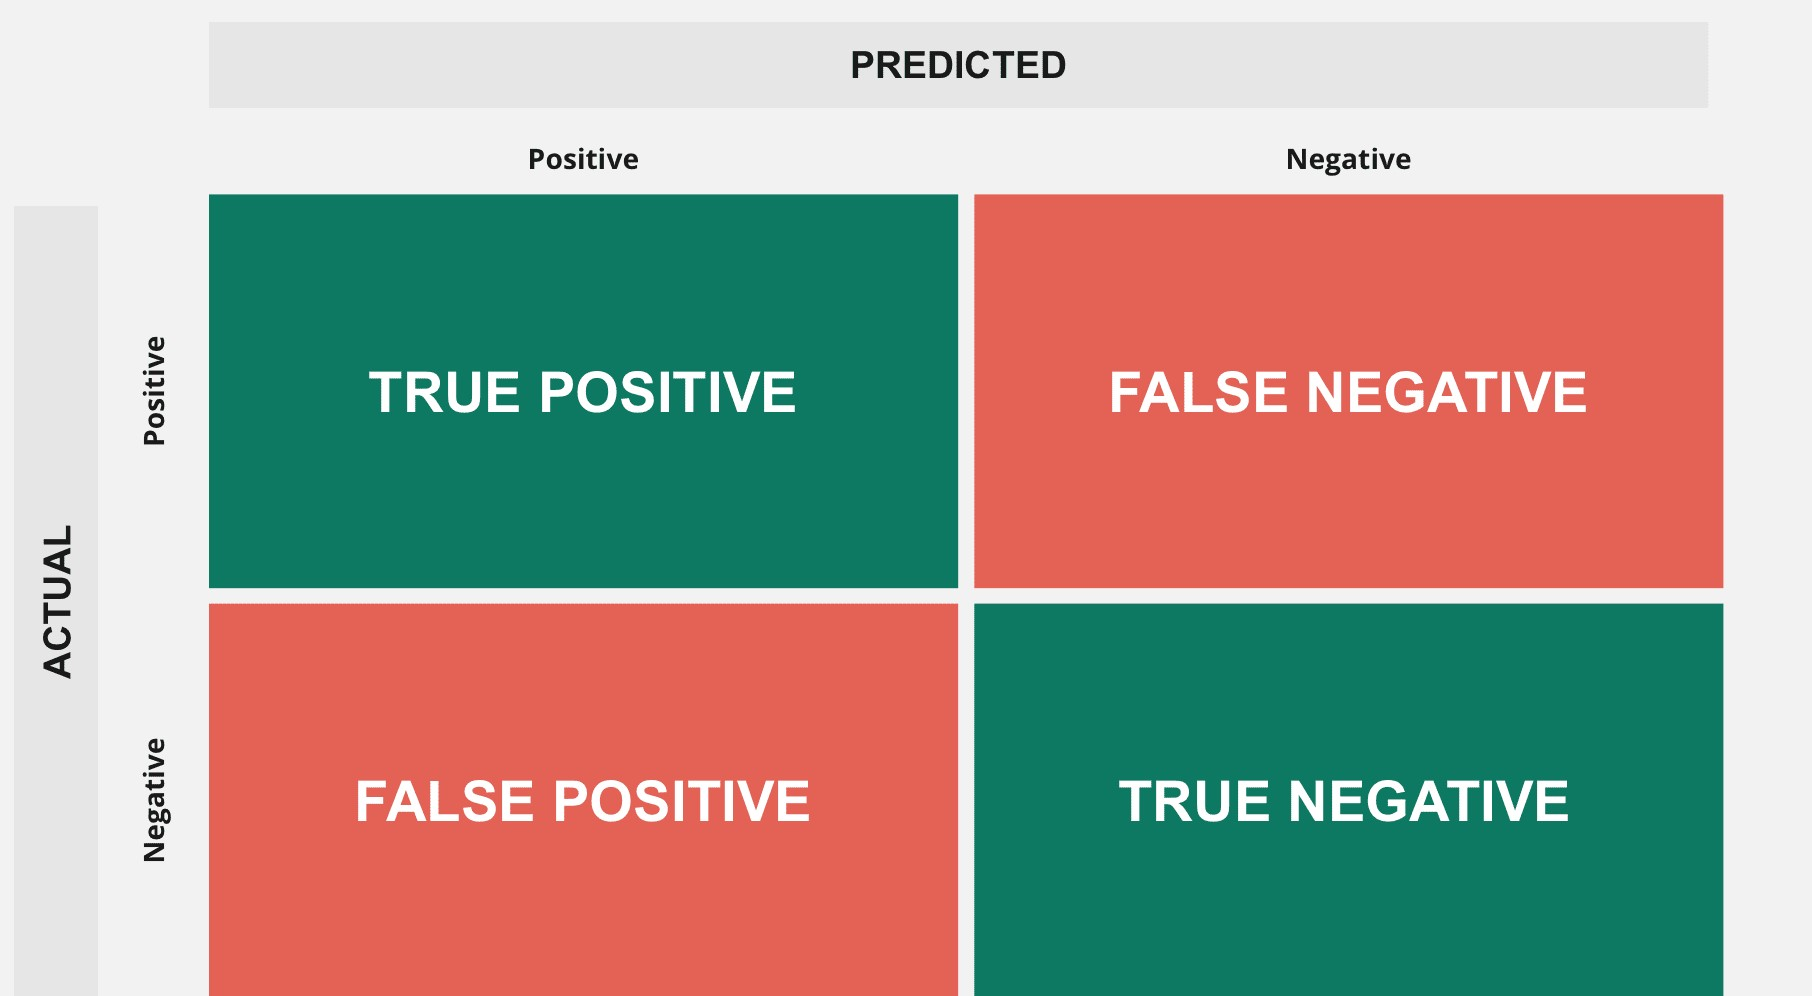
<h3 align="center">Consider the image above of confusion matrix to understand all the terms correctly</h3>

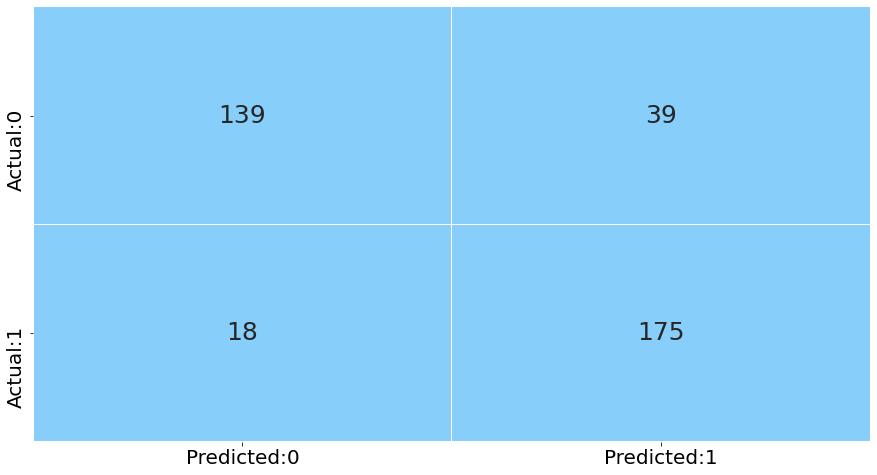

In [231]:
# call the function to plot the confusion matrix 
plot_confusion_matrix(model1)

In [232]:
# compute the performance measures on test data
test_report = get_test_report(model1)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       178
           1       0.82      0.91      0.86       193

    accuracy                           0.85       371
   macro avg       0.85      0.84      0.84       371
weighted avg       0.85      0.85      0.85       371



In [233]:
# compute kappa score on test set
kappa_value = kappa_score(model1)

# print the kappa value
print(kappa_value)

0.6908016902314564


<font color='blue'>**ROC-AUC score:**</font>

The metrics helps in selecting the best model. The model with high auc score is selected. AUC stands for area under the curve.
ROC stands for receiver operating characteristics.A good model needs the ROC curve to be near the y-axis and away from the x-axis to cover maximum area under the curve.

ROC curve is a trade off between true positive rate also known as recall or sensitivity and false positive rate known as specificity.The curve is drawn out of different threshold values.The threshold value selected depends upon the business requirement i.e. if the business wants both the FPR and TPR to be less or TPR to be less or FPR.


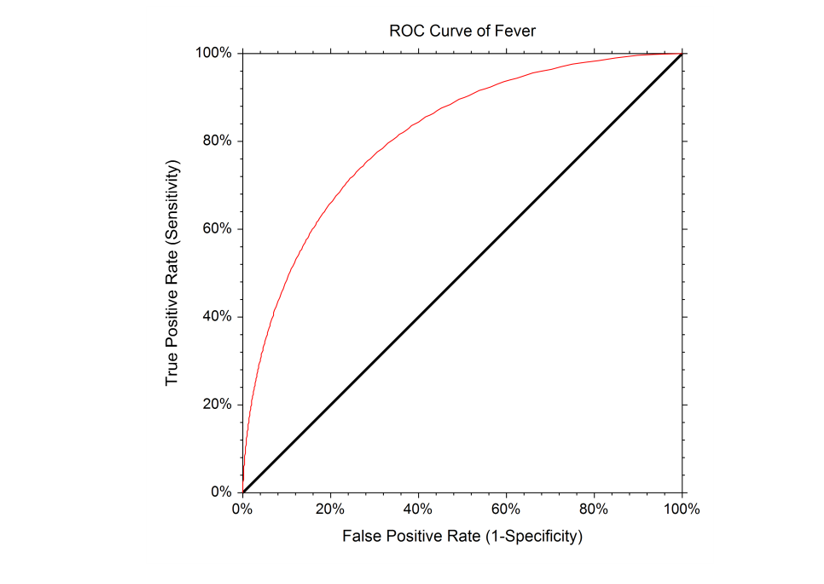

<font color='blue'><u>Formulae:</u></font>


FPR=$\frac{FP}{FP+TN}$

TPR=$\frac{TP}{TP+FN}$

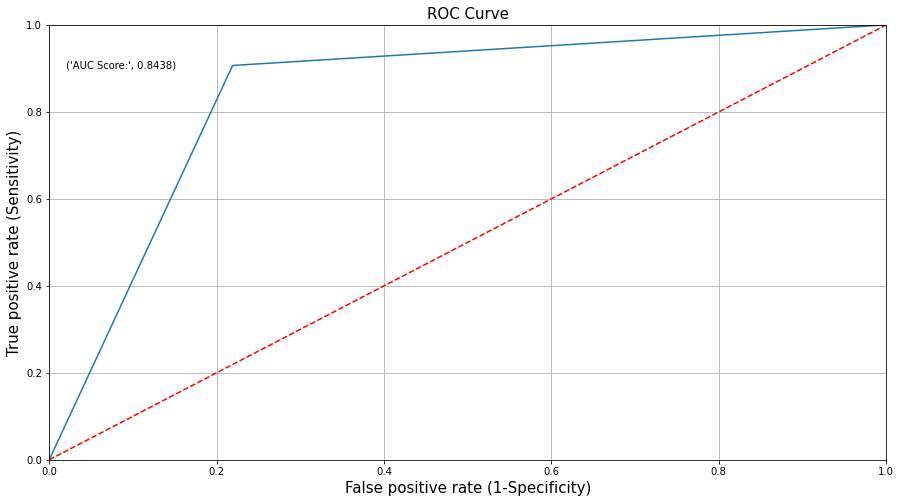

In [175]:
# calling the roc_auc function for plotting the roc curve
# The plot even gives the AUC score
plot_roc(model1)

In [176]:
# calling the function 'update_score_card' for updating the result
update_score_card(model_name='Logistics Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistics Regression,0.843817,0.817757,0.906736,0.846361,0.690802,0.859951


<a href="#Table-of-Contents">Back to top </a>

# 11.Model 2(Logistics Regression model fine tuned)

In [234]:
# defining all the parameters with different values in order to search for the best parameters to train the logistic regression model
# l1 is lasso regression and l2 is ridge regression
# C is the regularisation parameter
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.linspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [235]:
#instantiating logistic regression
model2=LogisticRegression()

In [179]:
# using 'GridSearchCV' to find the best parameters
lr = GridSearchCV(model2, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [236]:
# fitting the model on the training data
best_parameters = lr.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [237]:
# using the property 'best_estimator_' to get the best parameters as per the training 
best_parameters.best_estimator_

LogisticRegression(C=0.21052631578947345, penalty='l1', solver='saga')

In [238]:
# instantiating the model with the best parameters
model3=LogisticRegression(C=0.21052631578947345, penalty='l1', solver='saga')

# fitting the model
model3.fit(X_train,y_train)

LogisticRegression(C=0.21052631578947345, penalty='l1', solver='saga')

In [239]:
# predict the values
y_pred= model3.predict(X_test)


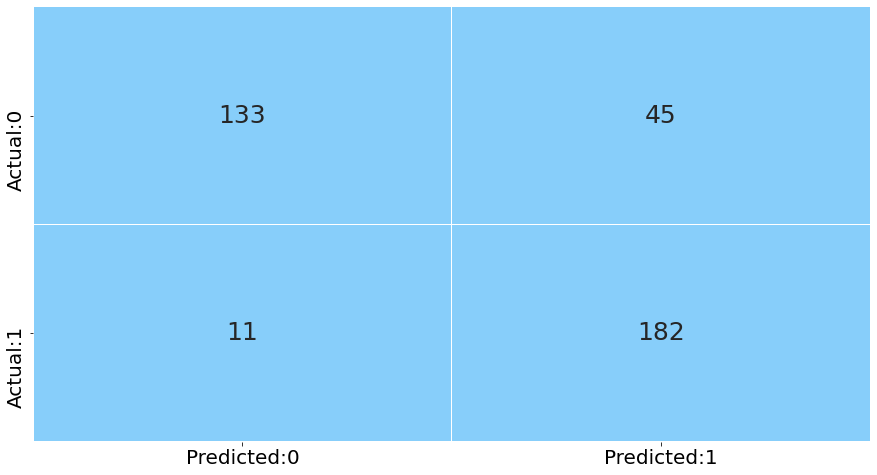

In [240]:
# calling the function 'confusion_matrix'
plot_confusion_matrix(model3)

In [241]:
# calling the function 'test_report' to get the classification report
test_report=get_test_report(model3)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       178
           1       0.80      0.94      0.87       193

    accuracy                           0.85       371
   macro avg       0.86      0.85      0.85       371
weighted avg       0.86      0.85      0.85       371



In [186]:
# compute kappa score on test set
kappa_value = kappa_score(model3)

# print the kappa value
print(kappa_value)

0.6953576351212645


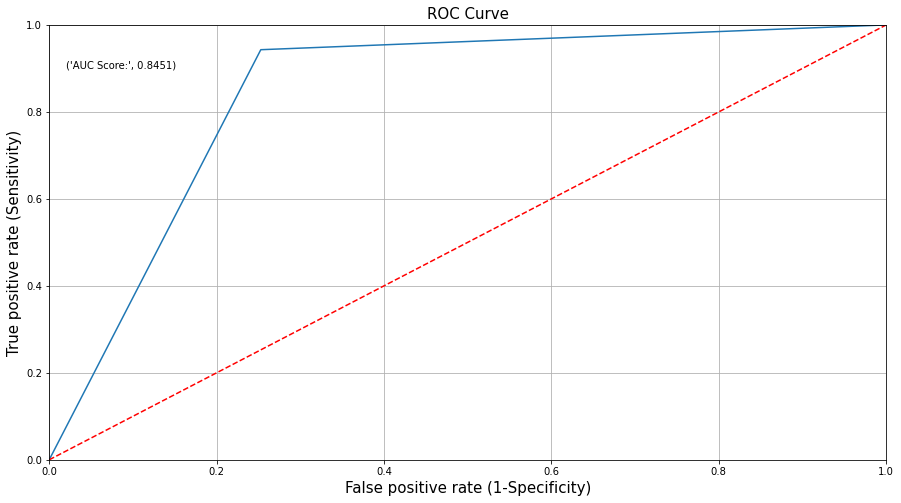

In [187]:
# plotting the ROC curve
# the function even gives the AUC score
plot_roc(model3)

In [188]:
# calling the function 'update_score_card' for updating the result
update_score_card(model_name='Logistics Regression with fine tuning')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistics Regression,0.843817,0.817757,0.906736,0.846361,0.690802,0.859951
1,Logistics Regression with fine tuning,0.845098,0.801762,0.943005,0.849057,0.695358,0.866667


# 12.Conclusion

Two models have been built.One is vanilla logistic regression and the second one using hyperparameter tuning.The scond model works better than the first model in predicting whether an employee requires mental attention or not.It is because second model has higher AUC score,accuracy score,kappa score and F1 score.

Pertaining to the reason sited above we will use the second model.

<a href="#Table-of-Contents">Back to top </a>